# CNN Image Classification Laboration


Images used in this laboration are from CIFAR 10 (https://en.wikipedia.org/wiki/CIFAR-10). The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class. Your task is to make a classifier, using a convolutional neural network, that can correctly classify each image into the correct class.

You need to answer all questions in this notebook. 

## Part 1: What is a convolution

To understand a bit more about convolutions, we will first test the convolution function in scipy using a number of classical filters. 

Convolve the image with Gaussian filter, a Sobel X filter, and a Sobel Y filter, using the function 'convolve2d' in 'signal' from scipy.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

In a CNN, many filters are applied in each layer, and the filter coefficients are learned through back propagation (which is in contrast to traditional image processing, where the filters are designed by an expert).

In [3]:
# This cell is finished

from scipy import signal
import numpy as np

# Get a test image
from scipy import misc
image = misc.ascent()

# Define a help function for creating a Gaussian filter
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

# Create Gaussian filter with certain size and standard deviation
gaussFilter = matlab_style_gauss2D((15,15),4)

# Define filter kernels for SobelX and Sobely
sobelX = np.array([[ 1, 0,  -1],
                    [2, 0, -2],
                    [1, 0, -1]]) 

sobelY = np.array([[ 1, 2,  1],
                    [0, 0, 0],
                    [-1, -2, -1]]) 

/tmp/ipykernel_3690/2994295117.py:8: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  image = misc.ascent()


In [2]:
# Perform convolution using the function 'convolve2d' for the different filters
filterResponseGauss = signal.convolve2d(image,gaussFilter)
filterResponseSobelX = signal.convolve2d(image,sobelX)
filterResponseSobelY = signal.convolve2d(image,sobelY)

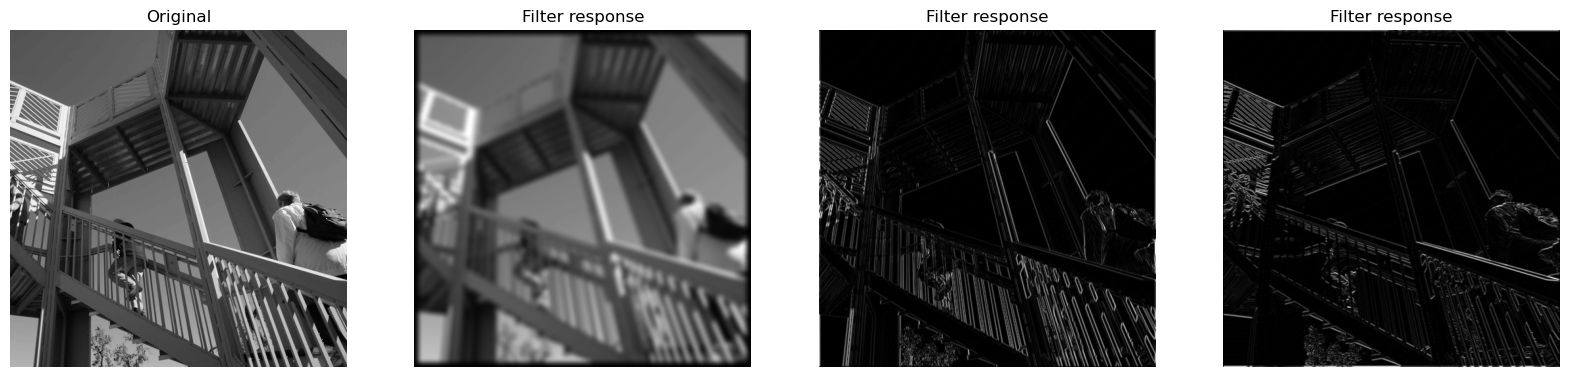

In [3]:
import matplotlib.pyplot as plt

# Show filter responses
fig, (ax_orig, ax_filt1, ax_filt2, ax_filt3) = plt.subplots(1, 4, figsize=(20, 6))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_filt1.imshow(np.absolute(filterResponseGauss), cmap='gray')
ax_filt1.set_title('Filter response')
ax_filt1.set_axis_off()
ax_filt2.imshow(np.absolute(filterResponseSobelX), cmap='gray')
ax_filt2.set_title('Filter response')
ax_filt2.set_axis_off()
ax_filt3.imshow(np.absolute(filterResponseSobelY), cmap='gray')
ax_filt3.set_title('Filter response')
ax_filt3.set_axis_off()

##  Part 2: Understanding convolutions

Question 1: What do the 3 different filters (Gaussian, SobelX, SobelY) do to the original image?

*Gaussian removes noises and also does smoothening which effects to a blurry effect*

*SobelX finds high gradient magnitudes horizontally*

*SobelY finds high gradient magnitudes vertically*

Question 2: What is the size of the original image? How many channels does it have? How many channels does a color image normally have?

*The size of the original image is 512X512*

*It has 1 channel*

*Usually an image will have 3 channels in the name RGB*

Question 3: What is the size of the different filters?

*The Gaussian filter has a size of 15X15*

*The SobelX has a size of 3X3*

*The SobelY has a size of 3X3*

Question 4: What is the size of the filter response if mode 'same' is used for the convolution ?

*By using the mode=same the size of the filter remains same as the input*

Question 5: What is the size of the filter response if mode 'valid' is used for the convolution? How does the size of the valid filter response depend on the size of the filter? 

*The size of filter response if mode= valid is 512 - (x dimension of filter)+1.*
*The valid mode makes the size of filter response smaller that the input image causing shrinkage*

Question 6: Why are 'valid' convolutions a problem for CNNs with many layers?

*The valid mode causes shrinkage and a CNN with many layers with valid mode cause recurring shrinkage and quickly run out of pixels resulting in loss of quality of modeling*

In [4]:
# Your code for checking sizes of image and filter responses
print(image.shape)
print(len(image.shape))
print(signal.convolve2d(image,gaussFilter,mode='same').shape)
print(signal.convolve2d(image,gaussFilter,mode='valid').shape)

(512, 512)
2
(512, 512)
(498, 498)


##  Part 3: Get a graphics card

Skip this part if you run on a CPU (recommended)

Let's make sure that our script can see the graphics card that will be used. The graphics cards will perform all the time consuming convolutions in every training iteration.

In [5]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

import keras.backend as K
import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

# Allow growth of GPU memory, otherwise it will always look like all the memory is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True) 

IndexError: list index out of range

##  Part 4: How fast is the graphics card?

Question 7: Why are the filters used for a color image of size 7 x 7 x 3, and not 7 x 7 ? 

*Due to the presence of 3 RGB channels for color pictures.*

Question 8: What operation is performed by the 'Conv2D' layer? Is it a standard 2D convolution, as performed by the function signal.convolve2d we just tested?

*conv2D layer uses cross correlation.*

Question 9: Do you think that a graphics card, compared to the CPU, is equally faster for convolving a batch of 1,000 images, compared to convolving a batch of 3 images? Motivate your answer.

*A graphics card has more number of cores than a CPU thus helps in parallel computing. Effectively it becomes more faster than CPU.*

##  Part 5:  Load data
Time to make a 2D CNN. Load the images and labels from keras.datasets, this cell is already finished.

In [6]:
from keras.datasets import cifar10
import numpy as np

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Download CIFAR train and test data
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

print("Training images have size {} and labels have size {} ".format(Xtrain.shape, Ytrain.shape))
print("Test images have size {} and labels have size {} \n ".format(Xtest.shape, Ytest.shape))

# Reduce the number of images for training and testing to 10000 and 2000 respectively, 
# to reduce processing time for this laboration
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

Xtest = Xtest[0:2000]
Ytest = Ytest[0:2000]

Ytestint = Ytest

print("Reduced training images have size %s and labels have size %s " % (Xtrain.shape, Ytrain.shape))
print("Reduced test images have size %s and labels have size %s \n" % (Xtest.shape, Ytest.shape))

# Check that we have some training examples from each class
for i in range(10):
    print("Number of training examples for class {} is {}" .format(i,np.sum(Ytrain == i)))

Training images have size (50000, 32, 32, 3) and labels have size (50000, 1) 
Test images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
 
Reduced training images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
Reduced test images have size (2000, 32, 32, 3) and labels have size (2000, 1) 

Number of training examples for class 0 is 1005
Number of training examples for class 1 is 974
Number of training examples for class 2 is 1032
Number of training examples for class 3 is 1016
Number of training examples for class 4 is 999
Number of training examples for class 5 is 937
Number of training examples for class 6 is 1030
Number of training examples for class 7 is 1001
Number of training examples for class 8 is 1025
Number of training examples for class 9 is 981


##  Part 6: Plotting

Lets look at some of the training examples, this cell is already finished. You will see different examples every time you run the cell.

C:\Users\sange\AppData\Local\Temp\ipykernel_7396\2415655609.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


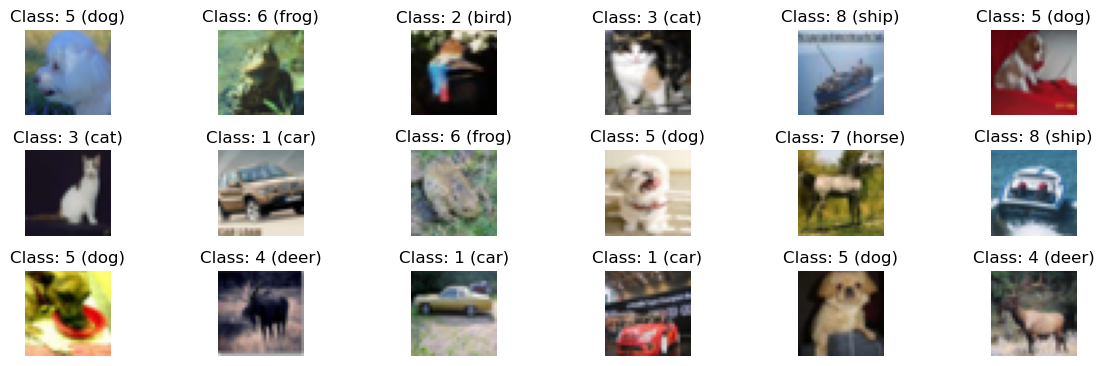

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
for i in range(18):
    idx = np.random.randint(7500)
    label = Ytrain[idx,0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(Xtrain[idx])
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

##   Part 7: Split data into training, validation and testing
Split your training data into training (Xtrain, Ytrain) and validation (Xval, Yval), so that we have training, validation and test datasets (as in the previous laboration). We use a function in scikit learn. Use 25% of the data for validation.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [8]:
from sklearn.model_selection import train_test_split

# Your code for splitting the dataset
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size=0.25, random_state=42)

# Print the size of training data, validation data and test data
for set in (Xtrain, Xval, Ytrain, Yval):
    print(f'{set.shape}')

(7500, 32, 32, 3)
(2500, 32, 32, 3)
(7500, 1)
(2500, 1)


##  Part 8: Preprocessing of images

Lets perform some preprocessing. The images are stored as uint8, i.e. 8 bit unsigned integers, but need to be converted to 32 bit floats. We also make sure that the range is -1 to 1, instead of 0 - 255. This cell is already finished.

In [9]:
# Convert datatype for Xtrain, Xval, Xtest, to float32
Xtrain = Xtrain.astype('float32')
Xval = Xval.astype('float32')
Xtest = Xtest.astype('float32')

# Change range of pixel values to [-1,1]
Xtrain = Xtrain / 127.5 - 1
Xval = Xval / 127.5 - 1
Xtest = Xtest / 127.5 - 1

##  Part 9: Preprocessing of labels

The labels (Y) need to be converted from e.g. '4' to "hot encoded", i.e. to a vector of type [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] . We use a function in Keras, see https://keras.io/api/utils/python_utils/#to_categorical-function

In [10]:
from tensorflow.keras.utils import to_categorical

# Print shapes before converting the labels

print('Shapes before converting:')
print(f'Ytrain.shape = {Ytrain.shape}')
print(f'Yval.shape = {Yval.shape}')
print(f'Ytest.shape = {Ytest.shape}')

# Your code for converting Ytrain, Yval, Ytest to categorical

Ytrain = to_categorical(Ytrain, num_classes=len(classes))
Yval = to_categorical(Yval, num_classes=len(classes))
Ytest = to_categorical(Ytest, num_classes=len(classes))

# Print shapes after converting the labels

print('Shapes after converting:')
print(f'Ytrain.shape = {Ytrain.shape}')
print(f'Yval.shape = {Yval.shape}')
print(f'Ytest.shape = {Ytest.shape}')




Shapes before converting:
Ytrain.shape = (7500, 1)
Yval.shape = (2500, 1)
Ytest.shape = (2000, 1)
Shapes after converting:
Ytrain.shape = (7500, 10)
Yval.shape = (2500, 10)
Ytest.shape = (2000, 10)


##  Part 10: 2D CNN
Finish this code to create the image classifier, using a 2D CNN. Each convolutional layer will contain 2D convolution, batch normalization and max pooling. After the convolutional layers comes a flatten layer and a number of intermediate dense layers. The convolutional layers should take the number of filters as an argument, use a kernel size of 3 x 3, 'same' padding, and relu activation functions. The number of filters will double with each convolutional layer. The max pooling layers should have a pool size of 2 x 2. The intermediate dense layers before the final dense layer should take the number of nodes as an argument, use relu activation functions, and be followed by batch normalization. The final dense layer should have 10 nodes (= the number of classes in this laboration) and 'softmax' activation. Here we start with the Adam optimizer.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`Conv2D()`, performs 2D convolutions with a number of filters with a certain size (e.g. 3 x 3). 

`BatchNormalization()`, perform batch normalization

`MaxPooling2D()`, saves the max for a given pool size, results in down sampling

`Flatten()`, flatten a multi-channel tensor into a long vector

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

See https://keras.io/api/layers/core_layers/dense/ and https://keras.io/api/layers/reshaping_layers/flatten/ for information on how the `Dense()` and `Flatten()` functions work

See https://keras.io/layers/convolutional/ for information on how `Conv2D()` works

See https://keras.io/layers/pooling/ for information on how `MaxPooling2D()` works

Import a relevant cost function for multi-class classification from keras.losses (https://keras.io/losses/) , it relates to how many classes you have.

See the following links for how to compile, train and evaluate the model

https://keras.io/api/models/model_training_apis/#compile-method

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

In [11]:
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, n_nodes=50, use_dropout=False, learning_rate=0.01):

    # Setup a sequential model
    model = Sequential()

    # Add first convolutional layer to the model, requires input shape
    model.add(Conv2D(filters= (1)*n_filters, kernel_size=(3,3), padding='same',activation='relu',input_shape= input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))  

    # Add remaining convolutional layers to the model, the number of filters should increase a factor 2 for each layer
    for i in range(n_conv_layers-1):
        model.add(Conv2D(filters= (2**(i+1))*n_filters, kernel_size=(3,3), padding='same',activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2,2)))                  

    # Add flatten layer
    model.add(Flatten())
    
    # Add intermediate dense layers
    for i in range(n_dense_layers):
        model.add(Dense(n_nodes, activation='relu'))
        model.add(BatchNormalization())
        
        if use_dropout:
            if use_dropout == True:
                use_dropout = 0.5
            model.add(Dropout(rate = use_dropout))
        
    # Add final dense layer
    model.add(Dense(10,activation='softmax'))
    
    # Compile model
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


    return model

In [12]:
# Lets define a help function for plotting the training results
import matplotlib.pyplot as plt
def plot_results(history):
    
    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

## Part 11: Train 2D CNN

Time to train the 2D CNN, start with 2 convolutional layers, no intermediate dense layers, learning rate = 0.01. The first convolutional layer should have 16 filters (which means that the second convolutional layer will have 32 filters).

Relevant functions

`build_CNN`, the function we defined in Part 10, call it with the parameters you want to use

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

See the following links for how to train and evaluate the model

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

## 2 convolutional layers, no intermediate dense layers

In [13]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model1 = build_CNN(input_shape,n_conv_layers=2,n_dense_layers=0)

# Train the model  using training data and validation data
history1 = model1.fit(Xtrain,Ytrain,epochs=epochs, batch_size=batch_size,validation_data=(Xval,Yval))

C:\Users\sange\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.2682 - loss: 4.0054 - val_accuracy: 0.3280 - val_loss: 1.8324
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.4552 - loss: 1.6756 - val_accuracy: 0.4172 - val_loss: 1.6132
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.5451 - loss: 1.3031 - val_accuracy: 0.4912 - val_loss: 1.4446
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.6124 - loss: 1.0943 - val_accuracy: 0.4940 - val_loss: 1.4367
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.6423 - loss: 1.0172 - val_accuracy: 0.5380 - val_loss: 1.3182
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6738 - loss: 0.9138 - val_accuracy: 0.5556 - val_loss: 1.3477
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.7141 - loss: 0.8178 - val_accuracy: 0.5576 - val_loss: 1.3330
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.7349 - loss: 0.7525 - val_accuracy: 0.5556 - v

In [14]:
# Evaluate the trained model on test set, not used in training or validation
score = model1.evaluate(Xtest,Ytest, batch_size=batch_size)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5311 - loss: 2.6013
Test loss: 2.6296
Test accuracy: 0.5295


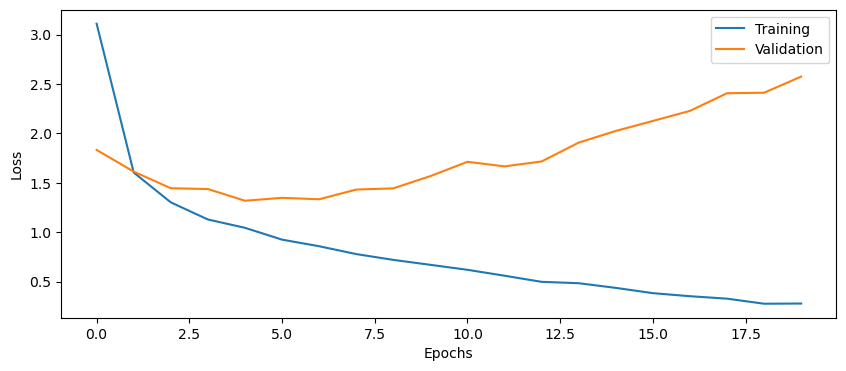

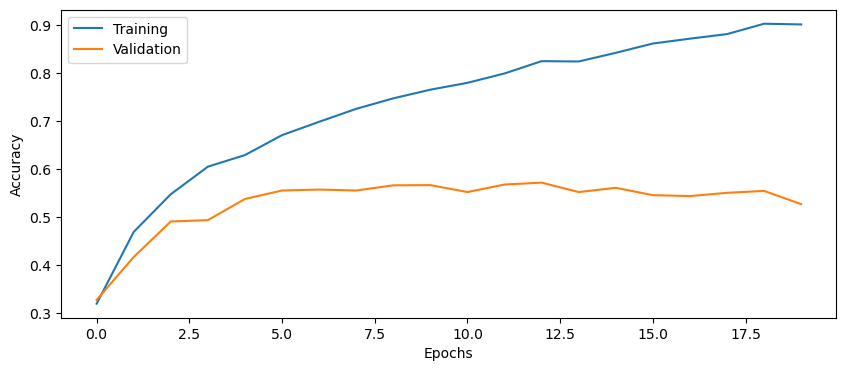

In [15]:
# Plot the history from the training run
plot_results(history1)

In [16]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,120 (301.25 KB)

 Trainable params: 25,674 (100.29 KB)

 Non-trainable params: 96 (384.00 B)

 Optimizer params: 51,350 (200.59 KB)

## Part 12: Improving performance

Write down the test accuracy, are you satisfied with the classifier performance (random chance is 10%) ? 

*The test accuracy is 0.5245 which is too low.*

Question 10: How big is the difference between training and test accuracy?

*Training accuracy is 0.9188 which is 0.3943 higher than the test accuracy*

Question 11: For the DNN laboration we used a batch size of 10,000, why do we need to use a smaller batch size in this laboration?

*The number of parameters in the data used for CNN is way too large( here each example has 32 x 32 x 3 dimensions) than that of DNN. Using a large batch size will burden the memory allocation. Therefore small batches are used.*

## 2 convolutional layers, 1 intermediate dense layer (50 nodes)

In [17]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = input_shape = Xtrain.shape[1:]

# Build model
model2 = build_CNN(input_shape,n_conv_layers=2,n_dense_layers=1,n_nodes=50)

# Train the model  using training data and validation data
history2 = model2.fit(Xtrain,Ytrain,epochs=epochs, batch_size=batch_size,validation_data=(Xval,Yval))

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.3303 - loss: 1.9273 - val_accuracy: 0.3012 - val_loss: 1.9582
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.5297 - loss: 1.3045 - val_accuracy: 0.2648 - val_loss: 2.0115
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.6075 - loss: 1.0883 - val_accuracy: 0.3664 - val_loss: 1.8650
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.6723 - loss: 0.9053 - val_accuracy: 0.4816 - val_loss: 1.6056
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.7587 - loss: 0.7134 - val_accuracy: 0.5212 - val_loss: 1.5165
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.7920 - loss: 0.5847 - val_accuracy: 0.5520 - val_loss: 1.5553
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.8472 - loss: 0.4408 - val_accuracy: 0.5696 - val_loss: 1.6239
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.8872 - loss: 0.3382 - val_accuracy: 0.5808 - 

In [18]:
# Evaluate the trained model on test set, not used in training or validation
score = model2.evaluate(Xtest, Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5656 - loss: 2.8778
Test loss: 2.9249
Test accuracy: 0.5620


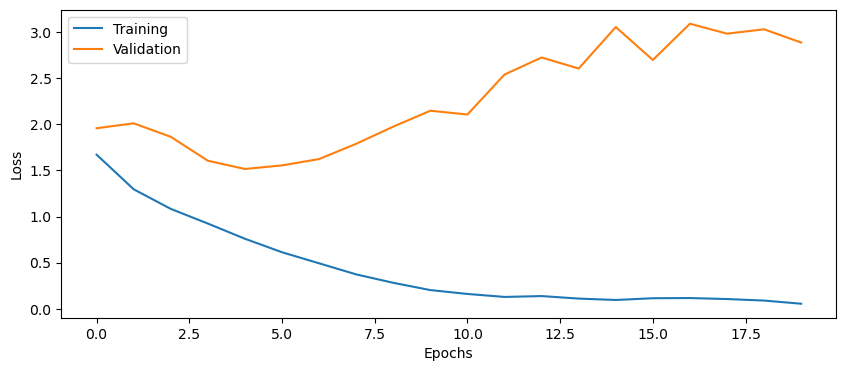

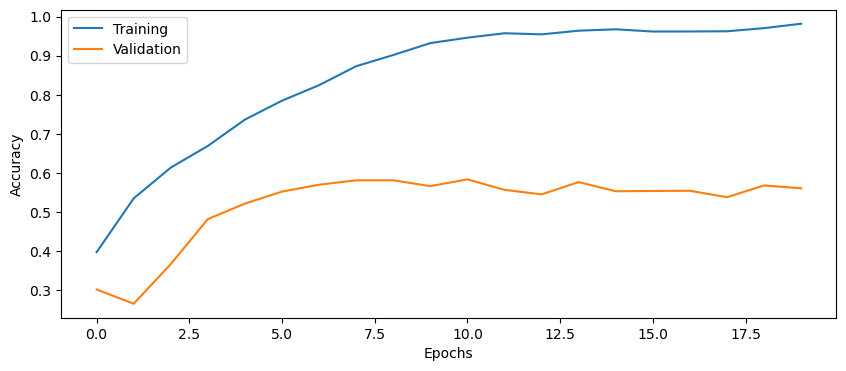

In [19]:
# Plot the history from the training run
plot_results(history2)

## 4 convolutional layers, 1 intermediate dense layer (50 nodes)

In [20]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model3 = build_CNN(input_shape, n_dense_layers=1, n_conv_layers=4,n_nodes= 50)


# Train the model  using training data and validation data
history3 = model3.fit(Xtrain, Ytrain, validation_data = (Xval, Yval), epochs= epochs, batch_size = batch_size)

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - accuracy: 0.3232 - loss: 1.9340 - val_accuracy: 0.2212 - val_loss: 3.2750
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.4801 - loss: 1.4172 - val_accuracy: 0.3756 - val_loss: 1.8987
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.5751 - loss: 1.1644 - val_accuracy: 0.4616 - val_loss: 1.5756
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.6263 - loss: 1.0303 - val_accuracy: 0.5676 - val_loss: 1.3358
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.7047 - loss: 0.8413 - val_accuracy: 0.5564 - val_loss: 1.4440
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.7573 - loss: 0.6925 - val_accuracy: 0.5480 - val_loss: 1.7834
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.8169 - loss: 0.5238 - val_accuracy: 0.5412 - val_loss: 1.9992
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.8474 - loss: 0.4443 - val_accuracy: 0.5724 - 

In [21]:
# Evaluate the trained model on test set, not used in training or validation
score = model3.evaluate(Xtest, Ytest)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6268 - loss: 2.0957
Test loss: 2.2341
Test accuracy: 0.6245


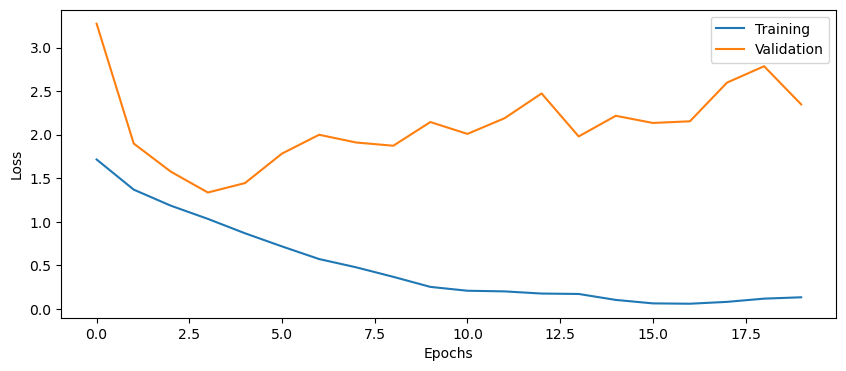

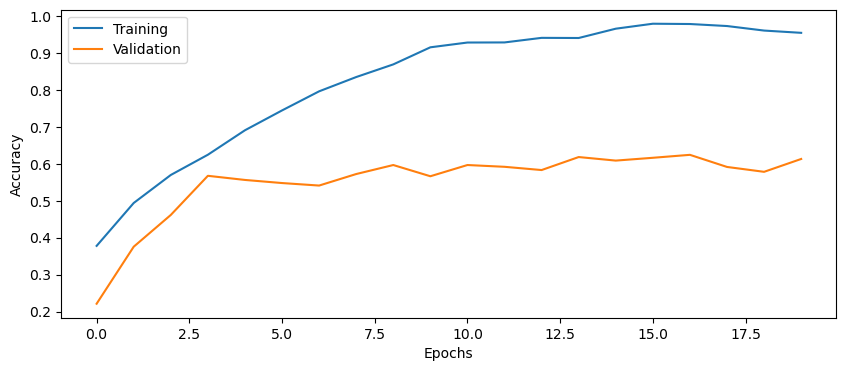

In [22]:
# Plot the history from the training run
plot_results(history3)

##  Part 13: Plot the CNN architecture

To understand your network better, print the architecture using `model.summary()`

Question 12: How many trainable parameters does your network have? Which part of the network contains most of the parameters?

*124,180 is the number of trainable parameters and conv2d_19 has most of the parameters*

Question 13: What is the input to and output of a Conv2D layer? What are the dimensions of the input and output? 

*Input: output of last layer which is a 4D tensor.*

*Output: a 4D tensor with the same image dimension as input with a doubled channels for each pixel which serves as input to the next layer.*

Question 14: Is the batch size always the first dimension of each 4D tensor? Check the documentation for Conv2D, https://keras.io/layers/convolutional/

*Yes.*

Question 15: If a convolutional layer that contains 128 filters is applied to an input with 32 channels, what is the number of channels in the output?

*128*

Question 16: Why is the number of parameters in each Conv2D layer *not* equal to the number of filters times the number of filter coefficients per filter (plus biases)?

*This is due to the influence of input channels. Conv2D performs almost like a 3D convolution in the dimension 3X3Xinputchannels.*

Question 17: How does MaxPooling help in reducing the number of parameters to train?

*With a default pooling size and padding as valid the number of parameters will result in shrinking*

In [23]:
# Print network architecture

model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │        25,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 373,122 (1.42 MB)

 Trainable params: 124,180 (485.08 KB)

 Non-trainable params: 580 (2.27 KB)

 Optimizer params: 248,362 (970.17 KB)

##  Part 14: Dropout regularization

Add dropout regularization between each intermediate dense layer, dropout probability 50%.

Question 18: How much did the test accuracy improve with dropout, compared to without dropout?

*Test Accuracy without dropout = 0.6165*

*Test Accuracy with dropout =0.6185*

Question 19: What other types of regularization can be applied? How can you add L2 regularization for the convolutional layers?

*Early stopping, L1 and L2 regularization, Data augmentation and Addition of noise are other types of regularisations. Set kernel_regularizer as tf.keras.regularizers.l2(l) ;denoting the L2 regularizers*


## 4 convolutional layers, 1 intermediate dense layer (50 nodes), dropout

In [24]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model4 = build_CNN(input_shape,n_conv_layers=4,n_dense_layers=1,n_nodes=50, use_dropout=True)

# Train the model  using training data and validation data
history4 = model4.fit(Xtrain,Ytrain,epochs=epochs, batch_size=batch_size,validation_data=(Xval,Yval))

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.2367 - loss: 2.3468 - val_accuracy: 0.3168 - val_loss: 1.8269
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.4033 - loss: 1.6111 - val_accuracy: 0.3820 - val_loss: 1.6653
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.4661 - loss: 1.4431 - val_accuracy: 0.4816 - val_loss: 1.4425
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.5261 - loss: 1.2983 - val_accuracy: 0.4984 - val_loss: 1.3378
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.5651 - loss: 1.1981 - val_accuracy: 0.4404 - val_loss: 1.7536
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.5963 - loss: 1.0937 - val_accuracy: 0.5356 - val_loss: 1.4601
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.6519 - loss: 0.9728 - val_accuracy: 0.5448 - val_loss: 1.4325
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.6942 - loss: 0.8801 - val_accuracy: 0.5560 

In [25]:
# Evaluate the trained model on test set, not used in training or validation
score = model4.evaluate(Xtest,Ytest, batch_size=batch_size)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5592 - loss: 2.3737
Test loss: 2.3870
Test accuracy: 0.5630


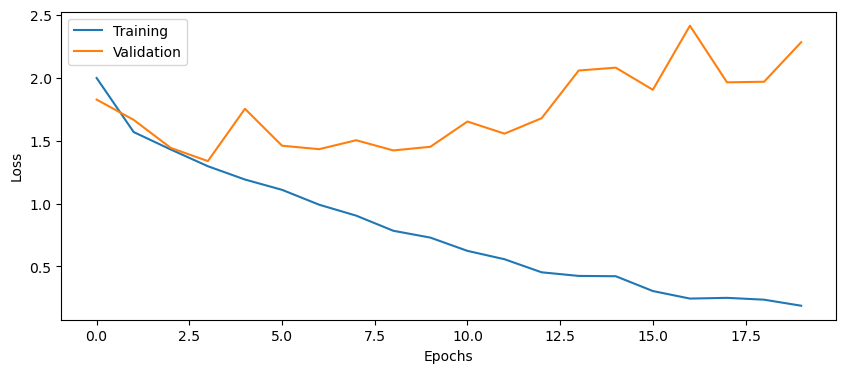

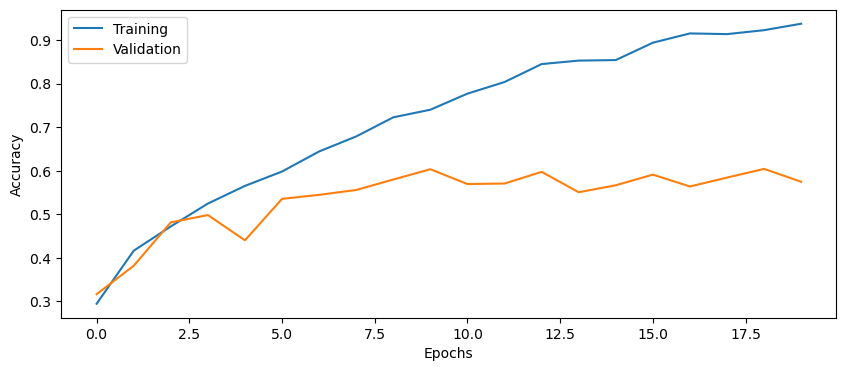

In [26]:
# Plot the history from the training run
plot_results(history4)

##  Part 15: Tweaking performance

You have now seen the basic building blocks of a 2D CNN. To further improve performance involves changing the number of convolutional layers, the number of filters per layer, the number of intermediate dense layers, the number of nodes in the intermediate dense layers, batch size, learning rate, number of epochs, etc. Spend some time (30 - 90 minutes) testing different settings.

Question 20: How high test accuracy can you obtain? What is your best configuration?

*The best Accuracy obtained is 0.6330*

*The batch size =100*

*Number of epochs =30*

*convolution layers = 4*

*Dense Layer = 1*

*Number of nodes = 100*

*Droprate = 0.7*

## Your best config

In [27]:
# Setup some training parameters
batch_size = 100
epochs = 30
input_shape = Xtrain.shape[1:]

# Build model
model5 = build_CNN(input_shape,n_conv_layers=4,n_dense_layers=1,n_nodes=100, use_dropout=0.7)
#model5 = build_CNN(input_shape,n_conv_layers=4,n_dense_layers=2,n_nodes=100, use_dropout=0.7)#.6120


# Train the model  using training data and validation data
history5 = model5.fit(Xtrain,Ytrain,epochs=epochs, batch_size=batch_size,validation_data=(Xval,Yval))


Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.2032 - loss: 2.7653 - val_accuracy: 0.2568 - val_loss: 2.0454
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.3586 - loss: 1.7292 - val_accuracy: 0.2796 - val_loss: 2.0843
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.4113 - loss: 1.5840 - val_accuracy: 0.3708 - val_loss: 1.7284
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.4632 - loss: 1.4507 - val_accuracy: 0.4512 - val_loss: 1.5838
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.4986 - loss: 1.3280 - val_accuracy: 0.5172 - val_loss: 1.3624
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.5349 - loss: 1.2832 - val_accuracy: 0.5348 - val_loss: 1.2870
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.5797 - loss: 1.1666 - val_accuracy: 0.5432 - val_loss: 1.3436
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.6175 - loss: 1.0516 - val_accuracy: 0.5424 - 

In [28]:
# Evaluate the trained model on test set, not used in training or validation
score = model5.evaluate(Xtest,Ytest, batch_size=batch_size)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6069 - loss: 2.2295
Test loss: 2.2750
Test accuracy: 0.6055


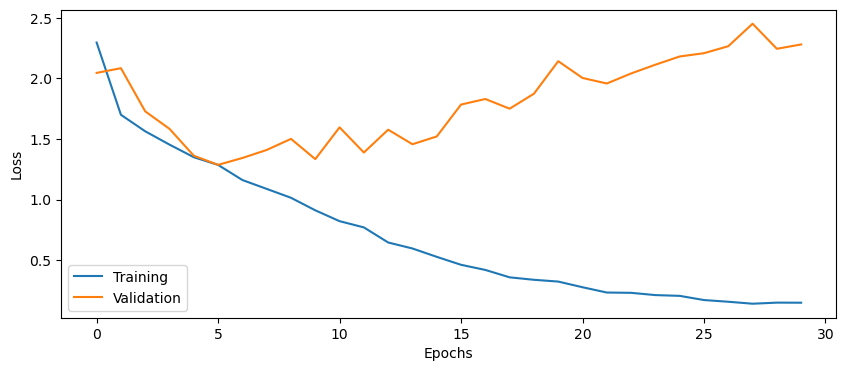

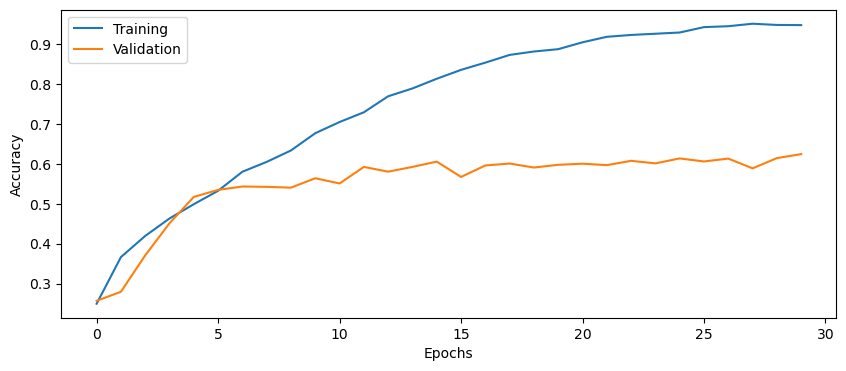

In [29]:
# Plot the history from the training run
plot_results(history5)

##  Part 16: Rotate the test images

How high is the test accuracy if we rotate the test images? In other words, how good is the CNN at generalizing to rotated images?

Rotate each test image 90 degrees, the cells are already finished.

Question 21: What is the test accuracy for rotated test images, compared to test images without rotation? Explain the difference in accuracy.

*Test accuracy for non rotation: 0.6330*

*Test accuracy for rotation: 0.2160*

*Difference= 0.4170*

*Since the model is not trained in rotated to images it cannot recognise the images. Introducing data augmentation will help in increasing accuracy*

In [30]:
def myrotate(images):

    images_rot = np.rot90(images, axes=(1,2))
    
    return images_rot

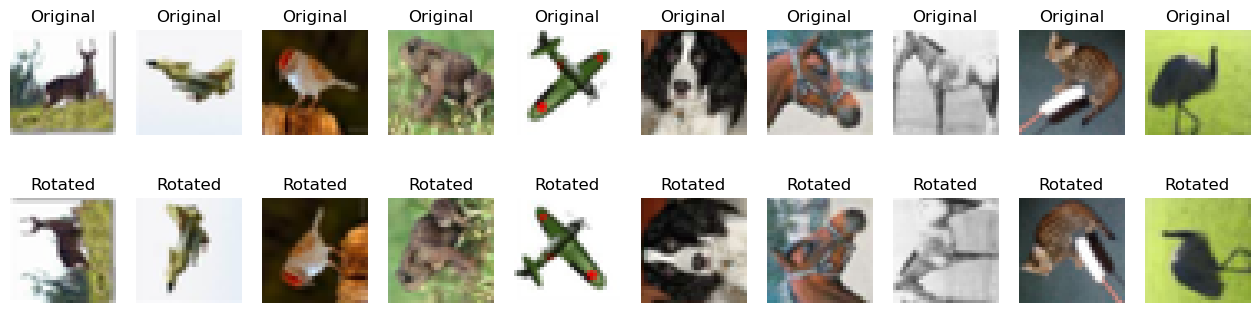

In [31]:
# Rotate the test images 90 degrees
Xtest_rotated = myrotate(Xtest)

# Look at some rotated images
plt.figure(figsize=(16,4))
for i in range(10):
    idx = np.random.randint(500)
    
    plt.subplot(2,10,i+1)
    plt.imshow(Xtest[idx]/2+0.5)
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(2,10,i+11)
    plt.imshow(Xtest_rotated[idx]/2+0.5)
    plt.title("Rotated")
    plt.axis('off')
plt.show()


In [32]:
# Evaluate the trained model on rotated test set
score = model5.evaluate(Xtest_rotated,Ytest, batch_size=batch_size)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2471 - loss: 6.5019
Test loss: 6.5934
Test accuracy: 0.2365


##  Part 17: Augmentation using Keras `ImageDataGenerator`

We can increase the number of training images through data augmentation (we now ignore that CIFAR10 actually has 60 000 training images). Image augmentation is about creating similar images, by performing operations such as rotation, scaling, elastic deformations and flipping of existing images. This will prevent overfitting, especially if all the training images are in a certain orientation.

We will perform the augmentation on the fly, using a built-in function in Keras, called `ImageDataGenerator`

See https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator , the .flow(x,y) functionality

Make sure to use different subsets for training and validation when you setup the flows, otherwise you will validate on the same data...

In [33]:
# Get all 60 000 training images again. ImageDataGenerator manages validation data on its own
(Xtrain, Ytrain), _ = cifar10.load_data()

# Reduce number of images to 10,000
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

# Change data type and rescale range
Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain / 127.5 - 1

# Convert labels to hot encoding
Ytrain = to_categorical(Ytrain, 10)

In [34]:
# Set up a data generator with on-the-fly data augmentation, 20% validation split
# Use a rotation range of 30 degrees, horizontal and vertical flipping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=0.3,horizontal_flip=True, vertical_flip=True,validation_split=0.2)

datagen.fit(Xtrain)

# Setup a flow for training data, assume that we can fit all images into CPU memory
datagen.flow(x=Xtrain,y=Ytrain, subset='training')

# Setup a flow for validation data, assume that we can fit all images into CPU memory
datagen.flow(x=Xtrain,y=Ytrain, subset='validation')

## Part 18: What about big data?

Question 22: How would you change the code for the image generator if you cannot fit all training images in CPU memory? What is the disadvantage of doing that change?

*Change loading the data in batches from the disk instead of loading the whole data into the CPU memory.*

*But this method will cause latency due to heavy I/O operations, it will also affect speed and increase the complexity of problem because of the batch wise operations.*

C:\Users\sange\AppData\Local\Temp\ipykernel_7396\3858214542.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


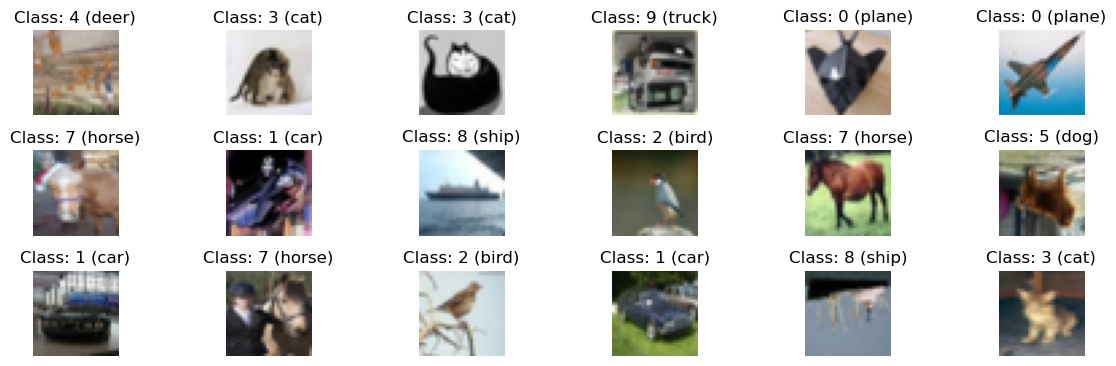

In [35]:
# Plot some augmented images
plot_datagen = datagen.flow(Xtrain, Ytrain, batch_size=1)

plt.figure(figsize=(12,4))
for i in range(18):
    (im, label) = next(plot_datagen)
    im = (im[0] + 1) * 127.5
    im = im.astype('int')
    label = np.flatnonzero(label)[0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

## Part 19: Train the CNN with images from the generator

See https://keras.io/api/models/model_training_apis/#fit-method for how to use model.fit with a generator instead of a fix dataset (numpy arrays)

To make the comparison fair to training without augmentation

    steps_per_epoch should be set to: len(Xtrain)*(1 - validation_split)/batch_size

    validation_steps should be set to: len(Xtrain)*validation_split/batch_size
    
This is required since with a generator, the fit function will not know how many examples your original dataset has.

Question 23: How quickly is the training accuracy increasing compared to without augmentation? Explain why there is a difference compared to without augmentation. We are here talking about the number of training epochs required to reach a certain accuracy, and not the training time in seconds. What parameter is necessary to change to perform more training?

*The training accuracy increases slowly over the large number of epochs. The slow increase is because each epoch is presented with new rotated images to be trained upon which makes training harder. Increased number of epochs will ensure effective training.*

Question 24: What other types of image augmentation can be applied, compared to what we use here?

*Translation, Random crop, Color Manipulation, Noise Insertion, Image Deformation, Flip, Scaling.*

In [36]:
steps_per_epoch = int(len(Xtrain)*(1 - 0.2)/batch_size)
print(steps_per_epoch)
range(0, steps_per_epoch)

80


range(0, 80)

In [54]:
train_generator = datagen.flow(Xtrain, Ytrain, batch_size=64,subset="training")
validation_generator = datagen.flow(Xtrain, Ytrain,batch_size=64, subset="validation")

In [56]:
# Setup some training parameters
batch_size = 100
epochs = 200
input_shape = Xtrain.shape[1:]

# Build model (your best config)
# Again for time considerations we are using:
# 4 convolutional layers, 1 intermediate dense layer (50 nodes), dropout
# and discussion/comparison is of course based on that
model6 = build_CNN(input_shape=input_shape, n_conv_layers=4,n_filters=32, n_dense_layers=1, n_nodes=100, use_dropout=True)

validation_split = 0.2

steps_per_epoch = int(len(Xtrain) * (1 - validation_split) / batch_size)
validation_steps = int(len(Xtrain) * validation_split / batch_size)

# Train the model using on-the-fly augmentation
history6 = model6.fit(train_generator,
                      steps_per_epoch=steps_per_epoch,
                      epochs=epochs,
                      validation_data=validation_generator,
                      validation_steps=validation_steps)


Epoch 1/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 22s 141ms/step - accuracy: 0.1969 - loss: 2.6008 - val_accuracy: 0.2820 - val_loss: 2.0205
Epoch 2/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.2975 - loss: 1.8071 - val_accuracy: 0.2139 - val_loss: 2.3008
Epoch 3/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 137ms/step - accuracy: 0.3240 - loss: 1.7790 - val_accuracy: 0.2586 - val_loss: 1.9932
Epoch 4/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.3628 - loss: 1.6879 - val_accuracy: 0.3486 - val_loss: 1.6134
Epoch 5/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 133ms/step - accuracy: 0.3654 - loss: 1.6694 - val_accuracy: 0.3266 - val_loss: 1.8632
Epoch 6/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.4053 - loss: 1.5951 - val_accuracy: 0.3764 - val_loss: 1.5363
Epoch 7/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - accuracy: 0.4192 - loss: 1.5698 - val_accuracy: 0.3883 - val_loss: 1.5945
Epoch 8/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.4586 - loss: 1.5174 - val_accu

In [57]:
# Check if there is still a big difference in accuracy for original and rotated test images

# Evaluate the trained model on original test set
score = model6.evaluate(Xtest, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Evaluate the trained model on rotated test set
score = model6.evaluate(Xtest_rotated, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 1.9726
Test accuracy: 0.6545
Test loss: 5.5490
Test accuracy: 0.2945


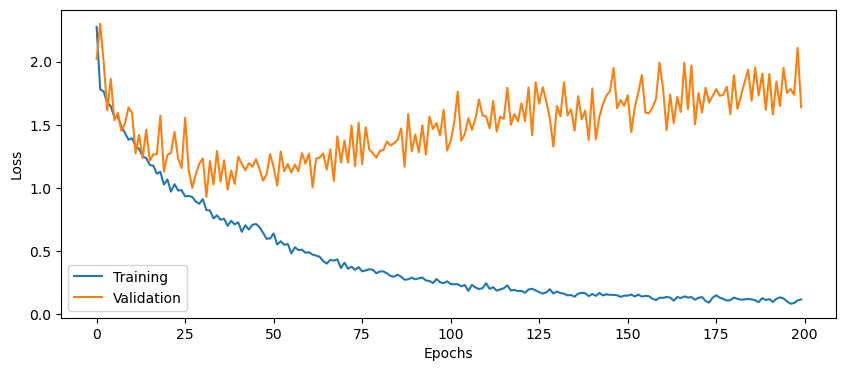

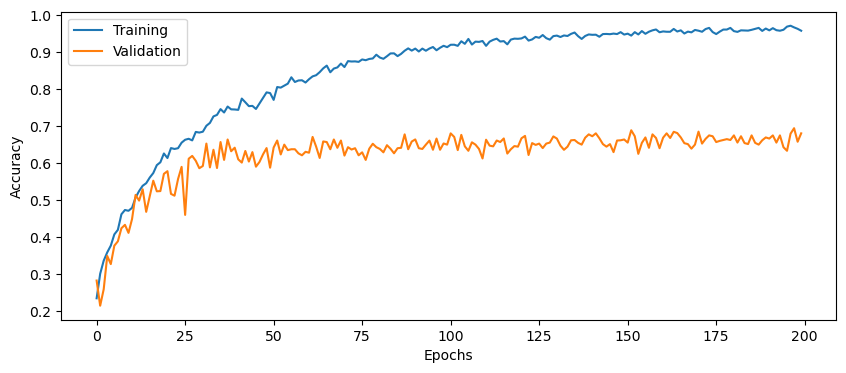

In [58]:
# Plot the history from the training run
plot_results(history6)

**NB: Due to error in the code set given, even trying to solve the error, didnt stop from aborting the trainingand validation in certain epochs. the 0s in the graph are the result of aborting the epoch iteration. But still the model learned to give output.**

## Part 20: Plot misclassified images

Lets plot some images where the CNN performed badly, these cells are already finished.

In [41]:
# Find misclassified images
y_pred=model6.predict(Xtest) 
y_pred=np.argmax(y_pred,axis=1)

y_correct = np.argmax(Ytest,axis=-1)

miss = np.flatnonzero(y_correct != y_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step


C:\Users\sange\AppData\Local\Temp\ipykernel_7396\2506020024.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


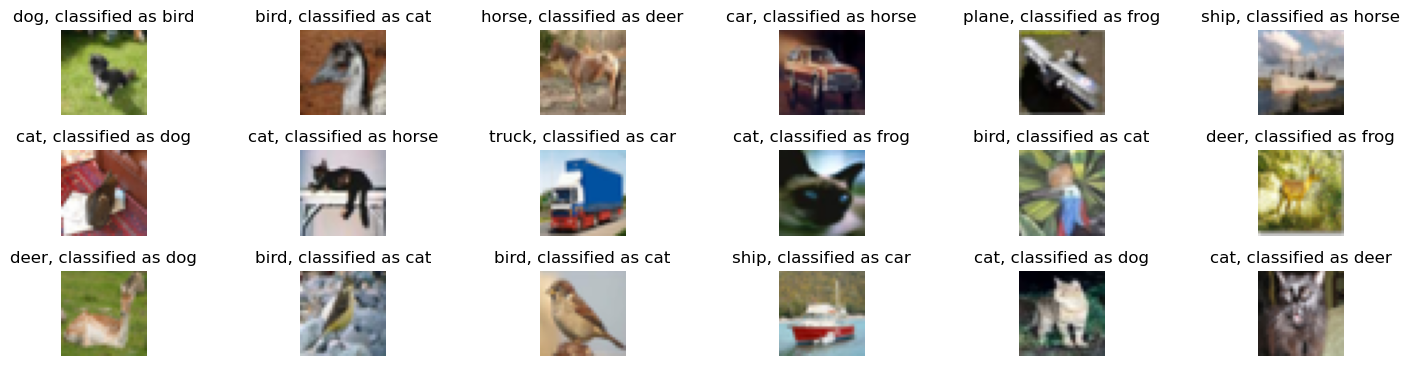

In [42]:
# Plot a few of them
plt.figure(figsize=(15,4))
perm = np.random.permutation(miss)
for i in range(18):
    im = (Xtest[perm[i]] + 1) * 127.5
    im = im.astype('int')
    label_correct = y_correct[perm[i]]
    label_pred = y_pred[perm[i]]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.axis('off')
    plt.title("{}, classified as {}".format(classes[label_correct], classes[label_pred]))
plt.show()

##  Part 21: Testing on another size

Question 25: This CNN has been trained on 32 x 32 images, can it be applied to images of another size? If not, why is this the case?

*Images with different resolution cannot be used in this CNN as the dense layer expects a feature vector of a certain length.*

Question 26: Is it possible to design a CNN that can be trained on images of one size, and then applied to an image of any size? How?

*Yes, it is possible if we define the convolution layers as well as pooling to be dynamic and a similar dimensioned output layer or if we exclude dense layer.*

##  Part 22: Pre-trained 2D CNNs

There are many deep 2D CNNs that have been pre-trained using the large ImageNet database (several million images, 1000 classes). Import a pre-trained ResNet50 network from Keras applications. Show the network using `model.summary()`

Question 27: How many convolutional layers does ResNet50 have? 

*50 convolutional layers*

Question 28: How many trainable parameters does the ResNet50 network have? 

*25,583,592*

Question 29: What is the size of the images that ResNet50 expects as input?

*224X224X3*

Question 30: Using the answer to question 28, explain why the second derivative is seldom used when training deep networks.

*The hessian matrix is calculated on the trainable parameters in each iteration. The second derivatives tremendously increase the computational expenditure*

Apply the pre-trained CNN to 5 random color images that you download and copy to the cloud machine or your own computer. Are the predictions correct? How certain is the network of each image class?

*The predictions are almost accurate and more attention to details*

These pre-trained networks can be fine tuned to your specific data, and normally only the last layers need to be re-trained, but it will still be too time consuming to do in this laboration.

See https://keras.io/api/applications/ and https://keras.io/api/applications/resnet/#resnet50-function 

Useful functions

`image.load_img` in tensorflow.keras.preprocessing

`image.img_to_array` in tensorflow.keras.preprocessing

`ResNet50` in tensorflow.keras.applications.resnet50

`preprocess_input` in tensorflow.keras.applications.resnet50

`decode_predictions` in tensorflow.keras.applications.resnet50

`expand_dims` in numpy


In [5]:
# Your code for using pre-trained ResNet 50 on 5 color images of your choice. 
# The preprocessing should transform the image to a size that is expected by the CNN.
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from numpy import expand_dims

model7 = ResNet50(weights='imagenet')
model7.summary()



Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [6]:
img_path = r'cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model7.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted: [('n02123159', 'tiger_cat', 0.46865124), ('n02124075', 'Egyptian_cat', 0.31514296), ('n02123045', 'tabby', 0.18448335)]


In [7]:
img_path = r'car.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model7.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Predicted: [('n03100240', 'convertible', 0.38940316), ('n03777568', 'Model_T', 0.307434), ('n04285008', 'sports_car', 0.1088319)]


In [8]:
img_path = r'cave.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model7.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Predicted: [('n09246464', 'cliff', 0.53187186), ('n07802026', 'hay', 0.15749204), ('n09428293', 'seashore', 0.13877909)]


In [9]:
img_path = r'dog.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model7.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Predicted: [('n02099601', 'golden_retriever', 0.99125427), ('n02099712', 'Labrador_retriever', 0.0065886085), ('n02100583', 'vizsla', 0.00042200703)]


In [10]:
img_path = r'flower.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model7.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Predicted: [('n11939491', 'daisy', 0.84954345), ('n02206856', 'bee', 0.091448), ('n02219486', 'ant', 0.03916081)]


The last one is interesting as the flower has a bee on it.